<a href="https://colab.research.google.com/github/JedRoundy/Predictive_Learning/blob/main/Modeling_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [ ]:
# Question 0: Create a DataFrame with three rows and four columns. Name the
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


### Regression Questions

The conceptual questions (which do not require coding) are skipped in this notebook

In [ ]:
# Question 1: Conceptual question; answer in MyEducator. Nothing to do here

In [ ]:
# Question 2: Conceptual question; answer in MyEducator. Nothing to do here

In [ ]:
# Question 3: Conceptual question; answer in MyEducator. Nothing to do here

In [ ]:
# Question 4: Conceptual question; answer in MyEducator. Nothing to do here

In [ ]:
# Question 5: Conceptual question; answer in MyEducator. Nothing to do here

In [ ]:
# Question 6: Download the StudentsPerformance.csv dataset that is provided with this exam. Import it into a DataFrame. Print a list of column names and their associated data types. Which columns would make sense to predict as a label in an MLR?
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf



df = pd.read_csv('/content/drive/MyDrive/455_Datasets/StudentsPerformance.csv')

df.info()

#Any of the math/reading/writing scores would be useful to predict.

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Question 7: Drop any rows that contain null values in any column using .dropna(). Use the statsmodels package to create an MLR/OLS model to predict math score as a function of the reading score and writing score. Do not split the data; use the entire dataset for training. Allow the y-intercept to vary.
df.dropna(inplace = True)

X = df[['reading score', 'writing score']].assign(const = 1)
y = df[['math score']]

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())
# Which feature best predicts their math score?
#After checking that both reading and writing are on the same scale, which means that standardizing the data isn't necessary, it is clear that reading most accurately predicts the math score.


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          2.25e-243
Time:                        05:47:41   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
reading score     0.6013      0.063      9.538

In [ ]:
# Question 8: In the original DataFrame convert each of the non-numeric features into dummy codes. Generate an OLS/MLR model (using the statsmodels package) to predict math score. However, do not include either reading score or writing score as features; only include those dummy codes created from the categorical features. Do not split the data; use the entire dataset for training. Print the results summary.
def get_stupid(df):
  dummy_cols = df.select_dtypes(include = 'object').columns
  dummy_df = pd.get_dummies(df[dummy_cols], drop_first = True)
  df.drop(columns = dummy_cols, inplace = True)
  df = pd.concat([df, dummy_df], axis = 1)
  return df

#Identify X and y
def XandY(label, drop_list, df):
  y = df[label]
  X = df.drop(columns = drop_list).assign(const = 1)
  return X,y

#Run Regression
def regress(y, X):
  model = sm.OLS(y,X)
  results = model.fit()
  return results



source = '/content/drive/MyDrive/455_Datasets/StudentsPerformance.csv'
label_list = ['math score']
drop_list = ['math score', 'reading score', 'writing score']

stupid_df = get_stupid(df.copy())


for label in label_list:
  X, y = XandY(label, drop_list, stupid_df)
  results = regress(y,X)
  print(results.summary())

#Yes, test prep classes improve math scores

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.12
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.62e-55
Time:                        05:47:41   Log-Likelihood:                -3990.3
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [ ]:
# Question 9: Generate OLS/MLR models to predict writing scores and reading scores using the same set of features. Similarly, drop the other two score features from each score model you create. For example, predict reading score, but do not include math score or writing score as features. Do not split the data; use the entire dataset for training. Print the results of each model summary.

label_list = ['math score', 'reading score', 'writing score']
drop_list = ['math score', 'reading score', 'writing score']


for label in label_list:
  X, y = XandY(label, drop_list, stupid_df)
  results = regress(y,X)
  print(results.summary())

# Which score (reading, writing, or math) is most accurately predicted?

#Writing Score

                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.12
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.62e-55
Time:                        05:47:42   Log-Likelihood:                -3990.3
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [ ]:
# Question 10: Using the last model you created to predict math score (which includes all of the dummy codes), what is the predicted math score of a child who is female, race/ethnicity_group C, parental level of education_some college, gets a reduced lunch, and has not taken a test preparation course? Print the predicted value.

label_list = ['math score']
drop_list = ['math score', 'reading score', 'writing score']


for label in label_list:
  X, y = XandY(label, drop_list, stupid_df)
  results = regress(y,X)
  print(results.summary())


#create desired features list. Excluded those already in constant
feature_list = ['race/ethnicity_group C', 'parental level of education_some college', 'test preparation course_none']

#create estiamted parameters list, assign and drop constant
param_list = results.params.tolist()
const = param_list[-1]
param_list.pop(-1)

#create named variables list, drop constant
var_list = results.params.index.tolist()
var_list.remove('const')

prediction = const
for feat in feature_list:
  prediction += param_list[var_list.index(feat)]

print(prediction)


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.12
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.62e-55
Time:                        05:47:42   Log-Likelihood:                -3990.3
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Classification


In [ ]:
# Question 11: Conceptual question; answer in MyEducator. Nothing to do here

In [ ]:
# Question 12: Conceptual question; answer in MyEducator. Nothing to do here

In [ ]:
# Question 13: Conceptual question; answer in MyEducator. Nothing to do here

In [ ]:
# Question 14: Conceptual question; answer in MyEducator. Nothing to do here

In [ ]:
#  Question 15: Import all needed packages for classification modeling, splitting the data, and calculating fit metrics. Import the Lending Club dataset found at: http://www.ishelp.info/data/lc_xs.csv. Alternatively, if the server is down, you can also download this data file from the MyEducator assignment description.
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/455_Datasets/lc_xs.csv')
df.head()

# How many records are in the dataset?
len(df)



20951

In [ ]:
# Question 16: Run the code below. If you named your DataFrame something other than 'df', then be sure to change 'df' to whatever your DataFrame is named before running the code.

df['loan_status'].value_counts()

# Based on the results, do you believe that Lending Club is doing a decent job of determining who will pay back their loans?



Current               13268
Fully Paid             5484
Charged Off            1708
Late (31-120 days)      313
In Grace Period         106
Late (16-30 days)        72
Name: loan_status, dtype: int64

In [ ]:
# QUESTION 17: Drop the features: loan_status_numeric, issue_d, title, emp_title, emp_length, earliest_cr_line, mths_since_last_delinq, mths_since_last_record, sub_grade. Pseudocode:
#      df.drop(columns=[name, name, ..., name], inplace=True)

df.drop(columns = ['loan_status_numeric', 'issue_d', 'title', 'emp_title', 'emp_length', 'earliest_cr_line', 'mths_since_last_delinq', 'mths_since_last_record', 'sub_grade'], inplace = True)

# Since customers who are Current, In Grace Period, Late (16-30 days), and Late (31-120 days) have not finished their loan, drop all records except for those which are Fully Paid or Charged Off. Pseudocode:
#      df.loc[(df['column_name'] == A) | (df['column_name'] == B)]

df = df.loc[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

# Drop any rows containing null data using the command: df.dropna(inplace=True).

df.dropna(inplace = True)

# Finally, create dummy codes for all remaining categorical features (but not for the label loan_status)

dummy_cols = df.select_dtypes(include = 'object').columns.tolist()
dummy_cols.remove('loan_status')
dummy_df = pd.get_dummies(df[dummy_cols])
df.drop(columns = dummy_cols, inplace = True)
df = pd.concat([df, dummy_df], axis = 1)

# Print out the first five records of the resulting DataFrame. How many columns are left after completing each of these tasks?
df.head()



<ipython-input-18-a5b743aec6f1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,loan_status,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,...,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
1,Charged Off,8000,8.39,252.14,5384.790000,3749.64,785.15,0.0,59000.0,0.0,...,1,0,0,0,1,0,0,0,0,0
2,Charged Off,35000,18.45,897.37,2763.860000,1094.39,1669.47,0.0,50000.0,0.0,...,0,0,1,0,0,0,1,0,0,0
3,Fully Paid,15000,11.39,493.86,15762.912745,15000.00,762.91,0.0,98000.0,0.0,...,0,0,1,0,1,0,0,0,0,0
6,Fully Paid,27250,17.27,975.21,27961.440003,27250.00,711.44,0.0,120000.0,0.0,...,0,0,1,0,0,0,1,0,0,0
10,Charged Off,30000,9.44,629.18,10403.600000,4499.17,2406.08,0.0,60000.0,0.0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Question 18: Set the y and X datasets assuming that loan_status will be the label. Print the first 5 records of X
label = 'loan_status'

y = df[label]
X = df.drop(columns = label)

X.head()

,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
1,8000,8.39,252.14,5384.790000,3749.64,785.15,0.0,59000.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
2,35000,18.45,897.37,2763.860000,1094.39,1669.47,0.0,50000.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
3,15000,11.39,493.86,15762.912745,15000.00,762.91,0.0,98000.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
6,27250,17.27,975.21,27961.440003,27250.00,711.44,0.0,120000.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
10,30000,9.44,629.18,10403.600000,4499.17,2406.08,0.0,60000.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Question 19: Split the data using a 50/50 split and random seed = 12345

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = .5, random_state = 12345)

# Next, train a Decision Tree Classifier model using a random_state=12345 and fit the model with the appropriate data set

clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)

# Print the Accuracy score using either the .accuracy_score() or .score() method of the Decision Tree Classifier model object. Be sure to pass in the appropriate data into those objects. What is that score? Copy and paste the entire number with all decimals included

model.score(X_test, y_test)

0.9844054580896686

In [ ]:
# Question 20: Predict the labels for test dataset and display them in a dataframe along with the actual values. Print only the LAST 10 records. Which row index was predicted incorrectly in these last 10 records?

y_pred = model.predict(X_test)

predict_df = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})

predict_df.tail(10)

,Actual,Predicted
20875,Charged Off,Charged Off
3411,Charged Off,Charged Off
3311,Charged Off,Fully Paid
11648,Fully Paid,Fully Paid
20422,Fully Paid,Fully Paid
20190,Charged Off,Charged Off
20358,Fully Paid,Fully Paid
13148,Charged Off,Charged Off
6668,Charged Off,Charged Off
19710,Fully Paid,Fully Paid


## Clustering


In [ ]:
# Question 21: Conceptual question; answer in MyEducator. Nothing to do here.

In [ ]:
# Question 22: Conceptual question; answer in MyEducator. Nothing to do here.

In [ ]:
# Question 23: Conceptual question; answer in MyEducator. Nothing to do here.

In [ ]:
# Question 24: Conceptual question; answer in MyEducator. Nothing to do here.

In [ ]:
# Question 25: Conceptual question; answer in MyEducator. Nothing to do here.

In [ ]:
# Question 26: Import the necessary libraries to perform your Clustering analysis. Once again, use the Lending Club dataset (lc_xs.csv) but reimport a fresh copy into a DataFrame
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial import distance as sdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score


df = pd.read_csv('/content/drive/MyDrive/455_Datasets/lc_xs.csv')

# Next, remove all columns that are not numeric. Once quick way to do that is using the np.number method of the numpy package: df.select_dtypes(np.number)
df = df.select_dtypes(np.number)
# Also, remove loan_status_numeric from the DataFrame since that is typically considered a label and we are going to generate our own cluster/label.
df.drop(columns = ['loan_status_numeric'], inplace = True)
# After completing the prior step, remove all rows that contain any null values (see the example code given to you above).
df.dropna(inplace = True)
# Finally, scale the remaining DataFrame using a MinMaxScalar().
scaler = MinMaxScaler()
df = pd.DataFrame(data = scaler.fit_transform(df), columns = df.columns)
# Print the first 5 records. What is the row index number of the second row?
df.head()


,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti
0,0.615385,0.338006,0.406298,0.332336,0.208836,0.362664,0.000000,0.078689,0.0,0.000000,...,0.572650,0.150,0.0,0.020624,0.708415,0.003575,0.153101,0.329268,0.026799,0.087799
1,0.435897,0.260125,0.272744,0.327031,0.237382,0.283325,0.000000,0.073189,0.0,0.111111,...,0.547009,0.175,0.0,0.043504,0.802348,0.000000,0.051893,0.463415,0.051558,0.280700
2,0.102564,0.240654,0.099272,0.123910,0.125000,0.031156,0.000000,0.048792,0.0,0.111111,...,0.675214,0.350,0.0,0.022434,0.732877,0.000000,0.056422,0.304878,0.028255,0.246589
3,0.102564,0.288941,0.101460,0.019922,0.017672,0.017134,0.000000,0.039034,0.0,0.111111,...,0.615385,0.275,0.0,0.014939,0.409980,0.003610,0.031795,0.231707,0.034081,0.393316
4,0.076923,0.104361,0.070148,0.096487,0.100000,0.018090,0.142694,0.117102,0.0,0.000000,...,0.452991,0.350,0.0,0.032425,0.236791,0.000000,0.255211,0.317073,0.133702,0.128535


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

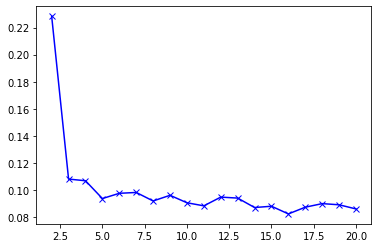

In [ ]:
# Question 27: Next, let's perform a Silhouette analysis to determine the optimal number of clusters. Calculate a silhouette score for KMeans models with n number of clusters = 2 though 20. Plot the results. What is the optimal number of clusters?
sil_score = []
for i in range(2,21,1):
  kmeans = KMeans(i, random_state = 12345).fit(df)
  sil_score.append(silhouette_score(df, kmeans.labels_))

plt.plot(range(2,21), sil_score, 'bx-')


In [ ]:
# Question 28: Generate a KMeans model using two clusters and a random seed of 12345. Add the assigned clusters as a new column in DataFrame.
kmeans = KMeans(2, random_state = 12345).fit(df)
# Which cluster has the most assigned cases?
df_clust = df.copy()
df_clust['C-grp'] = kmeans.labels_
df_clust

df_clust.groupby(by = 'C-grp').count()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti
C-grp,,,,,,,,,,,,,,,,,,,,,
0,371,371,371,371,371,371,371,371,371,371,...,371,371,371,371,371,371,371,371,371,371
1,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077,...,1077,1077,1077,1077,1077,1077,1077,1077,1077,1077


In [ ]:
# Question 29: Create a new DataFrame that displays the means of each feature seperately for the cases assigned both clusters (just like the example in the book).

# Which features played the largest role in determining clusters? Copy and paste the full name below exactly as it appears with no leading or trailing spaces.
df_grp = df_clust.groupby(by = 'C-grp').agg('mean')

df_grp = df_grp.T

df_grp['diff'] = df_grp[0] - df_grp[1]

df_grp.sort_values(by = 'diff', ascending = False)


C-grp,0,1,diff
loan_amnt,0.591173,0.225149,0.366023
installment,0.523429,0.201248,0.322181
total_pymnt,0.430904,0.136190,0.294714
total_rec_prncp,0.360755,0.117148,0.243608
total_rec_int,0.249806,0.075479,0.174327
int_rate,0.415308,0.326637,0.088671
revol_util,0.486238,0.427690,0.058548
tot_cur_bal,0.123416,0.076111,0.047305
annual_inc,0.118548,0.073891,0.044657
total_acc,0.287785,0.250119,0.037666


In [ ]:
# Question 30: What is the predicted/assigned cluster for a new loan with the following values:? [0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 0.12, 0.05]

prediction = kmeans.predict([[0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 0.12, 0.05]])[0]

print(prediction)

0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
